# Human Activity Recognition with Machine Learning Classifiers

In [1]:
import pandas as pd
# To do linear algebra
import numpy as np
# To create plots
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
# To create nicer plots
import seaborn as sns
# To create interactive plots
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

import itertools
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.shape

(7352, 563)

In [3]:
test_df.shape

(2947, 563)

## DATASET LOADING

In [4]:


train_df['Data'] = 'Train'
test_df['Data'] = 'Test'

tt_df = pd.concat([train_df,test_df], axis = 0).reset_index(drop = True)


## DATA CLEANING

In [3]:
#Check null values
train_df.isnull().values.any()
test_df.isnull().values.any()
# no null values in train and test data

False

In [4]:
print('Null values in DataFrme:{}\n'.format(tt_df.isna().sum().sum()))
tt_df.info()

Null values in DataFrme:0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 564 entries, tBodyAcc-mean()-X to Data
dtypes: float64(561), int64(1), object(2)
memory usage: 44.3+ MB


## DATA VISUALIZATION

In [5]:
tt_df.shape

(10299, 564)

In [44]:
tt_df.head(16)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Data
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,Train
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,Train
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,Train
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,Train
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,Train
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,Train
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,1,Train
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,1,Train
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,1,Train
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,1,Train


In [12]:
tt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 564 entries, tBodyAcc-mean()-X to Data
dtypes: float64(561), int64(1), object(2)
memory usage: 44.3+ MB


In [13]:
tt_df.columns.values

array(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z',
       'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y',
       'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y',
       'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1',
       'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3',
       'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3',
       'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y',
       'tBodyAcc-correlation()-

In [14]:
tt_df['Activity'].value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

In [15]:
label = tt_df.pop('Activity')

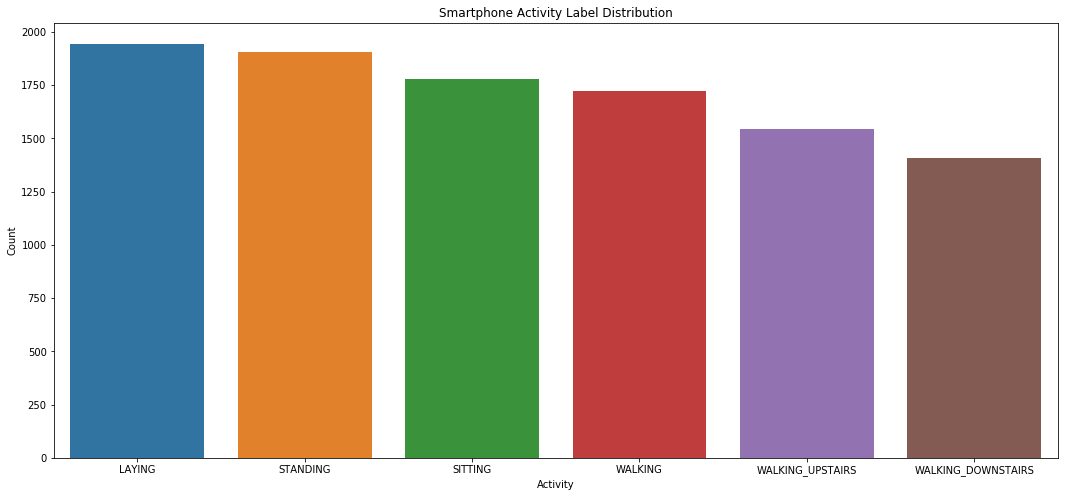

In [17]:
# Create data and plot
import seaborn as sns
label_counts= label.value_counts()
plt.figure(figsize=(18,8))
sns.barplot(x=label_counts.index, y=label_counts)
plt.title('Smartphone Activity Label Distribution')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.show()

## DATA PREPROCESSING

In [18]:
t_data = tt_df.copy()

In [19]:
# feature elimination
data_data = t_data.pop('Data')
subject_data = t_data.pop('subject')


## DATA NORMALIZATION

In [20]:
# Scale data
scl = StandardScaler()
tscl_data = scl.fit_transform(t_data)

In [25]:
a_scl_df= pd.DataFrame(data = tscl_data)
a_scl_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.210534,-0.068703,-0.452195,-0.883335,-0.945431,-0.744387,-0.874687,-0.944877,-0.773250,-0.868773,...,-0.819093,-0.000264,-0.299902,-0.357898,0.062039,-0.782988,-0.019034,-0.674432,0.382008,-0.016151
1,0.060208,0.035902,-0.275222,-0.890098,-0.929817,-0.860322,-0.883627,-0.927796,-0.858859,-0.884263,...,0.127803,-0.925905,-0.789555,0.135993,-0.022538,-1.217721,1.470315,-0.681360,0.383148,-0.000121
2,0.078460,-0.046427,-0.085548,-0.883565,-0.913598,-0.906457,-0.878093,-0.904569,-0.908437,-0.876139,...,1.172610,-0.287824,-0.461181,-0.375145,0.391762,0.134732,1.686961,-0.689471,0.384289,0.019214
3,0.071375,-0.227794,-0.270741,-0.885188,-0.946015,-0.935521,-0.879495,-0.943980,-0.938095,-0.876139,...,1.132149,0.566244,0.436736,-0.132194,-0.034739,1.010013,-0.982261,-0.688915,0.388536,0.024624
4,0.033738,0.031617,-0.121380,-0.889855,-0.940846,-0.935041,-0.882451,-0.937622,-0.940948,-0.883152,...,-0.158720,-0.165153,-0.263958,0.343504,0.268015,1.096950,-1.251689,-0.687381,0.399066,0.038649
5,0.042167,0.205936,0.071426,-0.888023,-0.960177,-0.947276,-0.880773,-0.959403,-0.953749,-0.883152,...,-0.434967,-0.770866,-0.734888,0.222616,-0.326566,0.417681,-0.740604,-0.690837,0.397990,0.045216
6,0.075514,-0.051103,-0.020688,-0.887079,-0.913595,-0.916798,-0.879261,-0.909585,-0.922591,-0.880400,...,0.077968,0.254210,0.172516,-0.655008,-0.521457,-0.004944,-0.371931,-0.695764,0.389306,0.041930
7,0.045623,-0.343282,-0.309923,-0.886254,-0.912681,-0.913001,-0.878009,-0.910032,-0.922254,-0.880400,...,0.039417,0.675504,0.634705,-0.084953,1.321915,-0.940592,0.983200,-0.693547,0.394572,0.045776
8,0.043566,-0.107934,-0.223000,-0.888008,-0.901719,-0.918170,-0.880696,-0.891285,-0.925756,-0.879677,...,0.763269,0.091168,0.144778,0.015595,0.175009,-0.408979,0.262026,-0.687589,0.411609,0.062928
9,0.092251,0.209641,0.053929,-0.882252,-0.924736,-0.924543,-0.875395,-0.925212,-0.928921,-0.878619,...,0.573174,1.992978,2.455309,-0.084067,-0.291450,-0.812378,-0.126769,-0.688221,0.415956,0.073887


## DIMENSIONALITY REDUCTION

In [22]:
# Reduce dimensions (speed up)
pca = PCA(n_components=56, random_state=3)
tpca_data = pca.fit_transform(tscl_data)

In [24]:
a_pca_df= pd.DataFrame(data = tpca_data)
a_pca_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,-16.380980,1.995083,3.415690,-0.649858,7.825062,-2.771964,2.298285,5.227722,-1.335518,-3.760113,...,1.202822,-1.621081,0.523452,1.448944,-0.671065,-1.402180,-0.408266,-1.049492,0.210186,-1.162783
1,-15.582173,1.182594,-0.321207,2.748083,4.729536,-1.588823,-0.334051,1.621178,-0.006349,0.072033,...,-0.050959,-1.117713,-0.514232,0.771116,0.826274,-0.866522,2.067992,-1.035570,0.997672,0.773101
2,-15.423989,2.243166,-1.237784,4.002881,4.402735,-1.035089,-0.129769,1.279185,0.190752,-0.780886,...,-0.811356,0.097109,-0.133284,-0.497847,-0.257775,-1.518371,-0.295446,0.135573,0.167419,0.039093
3,-15.647807,3.762882,-1.275283,2.806663,3.239111,-0.743524,0.326070,1.742981,0.912210,-1.594733,...,-0.030091,0.400112,0.141173,-0.888919,-1.092628,-1.283995,0.449381,-0.385889,0.241540,0.914077
4,-15.842320,4.438897,-1.808232,3.160507,3.331172,-0.911551,-0.861932,0.090127,0.521630,1.015851,...,-0.314693,-0.219477,-1.194107,0.280626,-0.297355,-0.142072,-0.409556,-1.746052,0.998709,0.229112
5,-15.644768,4.620174,-2.128847,2.772336,2.462463,-0.880587,-1.184857,-1.404088,0.692880,1.486064,...,0.900755,0.013206,-0.777793,0.843790,-0.631335,0.599855,-0.693150,-0.480850,0.510208,0.217391
6,-15.181595,3.005875,-1.492704,2.855691,3.375166,-0.422261,0.343856,0.081563,0.483202,-0.423042,...,-0.589346,0.811153,-0.783926,0.813121,-0.267247,-0.223487,0.406502,-0.650954,0.555704,0.195575
7,-15.507233,1.928011,-0.096154,2.040368,4.073975,-0.079800,-0.468970,1.515363,-0.725551,-1.074619,...,-2.412822,1.547969,-1.101065,0.755518,0.181821,-0.763610,0.409307,-0.492898,0.372211,-1.242640
8,-15.776544,3.088752,-0.251686,2.168520,3.928048,-0.772802,-0.155308,3.122508,-0.266276,-1.123786,...,-1.491506,-0.339166,0.388065,-0.008915,0.767530,-1.080922,-0.481172,0.081483,1.009088,-1.551260
9,-14.369887,2.437092,-2.754472,3.582280,1.233878,1.416812,0.072700,-1.433899,0.882630,2.347465,...,1.554766,-1.171774,0.269215,0.208624,-1.222408,0.308481,-0.056556,0.595974,0.573308,-0.063677


## DATA TRANSFORMATION

In [19]:
# Transform data
tsne = TSNE(random_state=3)
tsne_transformed = tsne.fit_transform(tpca_data)

In [20]:
a_tsne_df= pd.DataFrame(data = tsne_transformed)
a_tsne_df.head()

,0,1
0,-40.503754,-12.138510
1,-39.208256,-3.933099
2,-39.104271,-12.764968
3,-29.878183,-10.394890
4,-41.734413,-38.849155


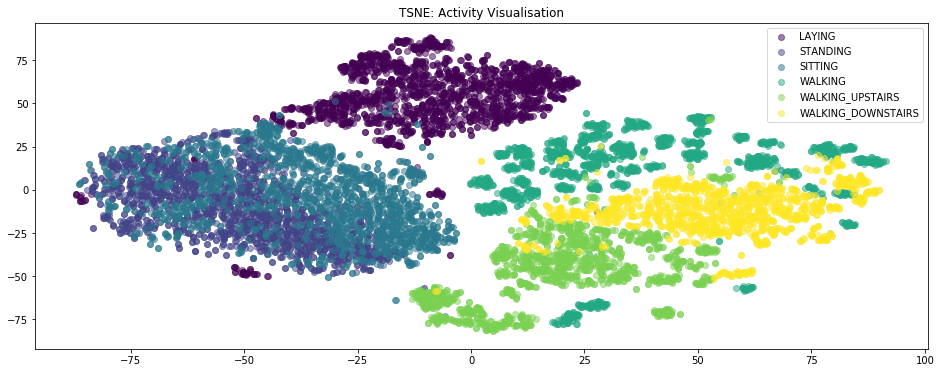

In [21]:
### Plot Activities
plt.figure(figsize=(16,6))

# Get colors
n = label.unique().shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each activity
for i, group in enumerate(label_counts.index):
    # Mask to separate sets
    mask = (label==group).values
    plt.scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)
plt.title('TSNE: Activity Visualisation')
plt.legend()

## DATASET SPLITTING 

In [26]:
#Split training testing data
    enc = LabelEncoder()
    label_encoded = enc.fit_transform(label)
    df_traindata,df_testdata,df_trainlabel,df_testlabel = train_test_split(a_pca_df, label_encoded,random_state=3)

## MODELLING

In [27]:
#Baseline Comparing model accuracy using all features accross classifiers
classifiers = [
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    ]

## TRAINING

In [32]:
#  Train Accuracy
algo = []
scores = []
for clf in classifiers:
    algo.append(clf.__class__.__name__)
    scores.append(cross_val_score(clf,df_traindata,df_trainlabel, cv=5).mean())
warnings.filterwarnings('ignore')
Naivescore_df_Train = pd.DataFrame({'Algorithm': algo, 'Score': scores}).set_index('Algorithm')
Naivescore_df_Train.head()

,Score
Algorithm,
GaussianNB,0.826381
DecisionTreeClassifier,0.818998
RandomForestClassifier,0.879590
KNeighborsClassifier,0.938504
SVC,0.952740


## TESTING

In [42]:
#  Test Accuracy
from sklearn import metrics
algo = []
scores = []
for clf in classifiers:
    clf = clf.fit(df_traindata, df_trainlabel)
    y_pred = clf.predict(df_testdata)
    algo.append(clf.__class__.__name__)
    scores.append(accuracy_score(y_pred, df_testlabel))
    print('=============',clf.__class__.__name__,'==================')
    
    print('\nModel Accuracy:',accuracy_score(y_pred, df_testlabel)*100)
    print('Confusion Matrix:')
    print(metrics.confusion_matrix(df_testlabel, y_pred))
    print('classificationReport:')
    print(metrics.classification_report(df_testlabel, y_pred))
    
    
warnings.filterwarnings('ignore')
Naivescore_df_Test  = pd.DataFrame({'Algorithm': algo, 'Score': scores}).set_index('Algorithm')


============= GaussianNB ==================

Model Accuracy: 83.49514563106796
Confusion Matrix:
[[468   3   2   0  28   1]
 [  5 309 107   1  18   3]
 [  1  34 397   4  15   6]
 [  0   0   0 385  42  19]
 [  0   0   0  38 244  61]
 [  0   0   0   6  31 347]]
classificationReport:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       502
           1       0.89      0.70      0.78       443
           2       0.78      0.87      0.82       457
           3       0.89      0.86      0.88       446
           4       0.65      0.71      0.68       343
           5       0.79      0.90      0.85       384

   micro avg       0.83      0.83      0.83      2575
   macro avg       0.83      0.83      0.83      2575
weighted avg       0.84      0.83      0.84      2575

============= DecisionTreeClassifier ==================

Model Accuracy: 83.57281553398059
Confusion Matrix:
[[480  16   5   0   1   0]
 [ 21 321 100   0   0   1]
 [  2 105 35

In [47]:
Naivescore_df_Test.head()

,Score
Algorithm,
GaussianNB,0.834951
DecisionTreeClassifier,0.837282
RandomForestClassifier,0.893204
KNeighborsClassifier,0.950291
SVC,0.959223


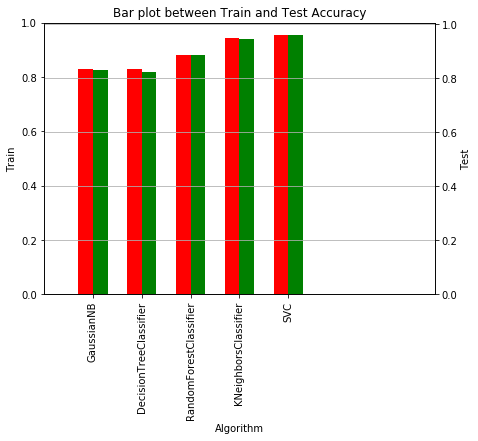

In [43]:
# Bar plot between Train and Test Accuracy
fig = plt.figure(figsize=(7,5)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .3

Naivescore_df_Train.Score.plot(kind='bar',color='green',ax=ax,width=width, position=0)
Naivescore_df_Test.Score.plot(kind='bar',color='red', ax=ax2,width = width,position=1)

ax.grid(None, axis=1)
ax2.grid(None)

ax.set_ylabel('Train')
ax2.set_ylabel('Test')

ax.set_xlim(-1,7)
plt.title('Bar plot between Train and Test Accuracy')
plt.show()